In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Mukul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../Excel/Mall_Customers.csv")

In [5]:
df.drop(['CustomerID', 'Gender'], axis = 1, inplace = True)

In [8]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

In [13]:
se = StandardScaler().fit_transform(df)

In [15]:
from sklearn.mixture import GaussianMixture as gmm

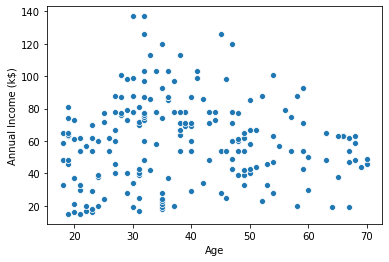

In [19]:
sns.scatterplot('Age','Annual Income (k$)', data = df)

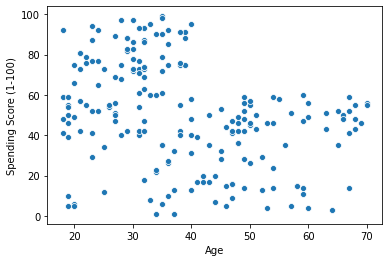

In [17]:
sns.scatterplot('Age','Spending Score (1-100)', data = df)

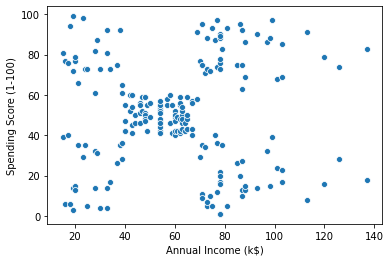

In [18]:
sns.scatterplot('Annual Income (k$)','Spending Score (1-100)', data = df)

In [20]:
n_comp = np.arange(1,10)
cova_type = ['full', 'spherical', 'diag']

In [21]:
bic = []
aic = []

In [22]:
from itertools import product

In [23]:
gmm_params = list(product(n_comp, cova_type))

In [26]:
for i in gmm_params:
    GMM = gmm(n_components = i[0], covariance_type = i[1], random_state = 0).fit(se)
    bic.append(GMM.bic(se))
    aic.append(GMM.aic(se))

In [35]:
gmm_df = pd.DataFrame(gmm_params, columns = ['n_components', 'covariance'])

In [37]:
gmm_df.loc[:, 'bic'] = bic

In [38]:
gmm_df.loc[:, 'aic'] = aic

In [40]:
gmm_df.head(5)

,n_components,covariance,bic,aic
0,1,full,1727.721619,1698.036762
1,1,spherical,1723.919509,1710.726240
2,1,diag,1734.516144,1714.726240
3,2,full,1656.962213,1594.294183
4,2,spherical,1720.303808,1690.618952


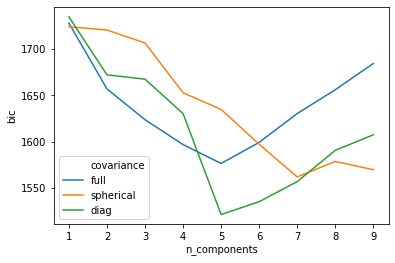

In [43]:
sns.lineplot('n_components', 'bic', data = gmm_df, hue = 'covariance')

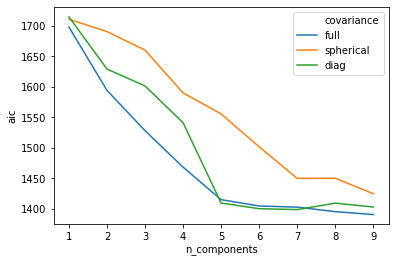

In [44]:
sns.lineplot('n_components', 'aic', data = gmm_df, hue = 'covariance')

In [67]:
GMM_Final = gmm(n_components = 5, covariance_type = 'diag', random_state = 0).fit(se)

### Based on the AIC & BIC curve, we can say that the best n components we can go with is 5 and the best covariance would be "Diag" for our model.

In [68]:
labels = GMM_Final.predict(se)

In [69]:
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int64)

In [70]:
col = df.columns

In [71]:
GMM_data = pd.DataFrame(se, columns = col)

In [72]:
GMM_data.loc[:, 'label'] = labels

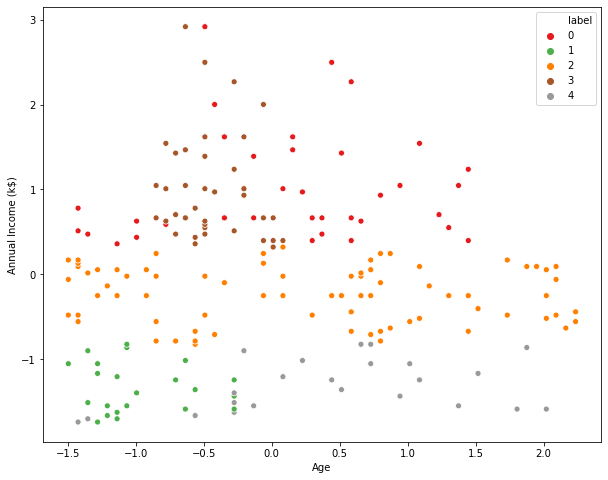

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot('Age', 'Annual Income (k$)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

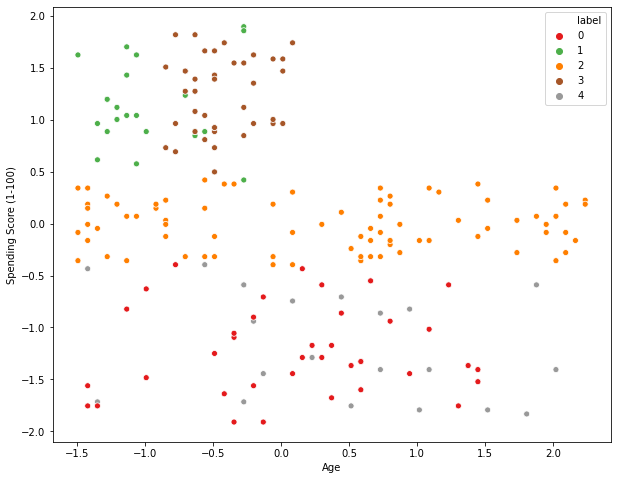

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot('Age', 'Spending Score (1-100)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

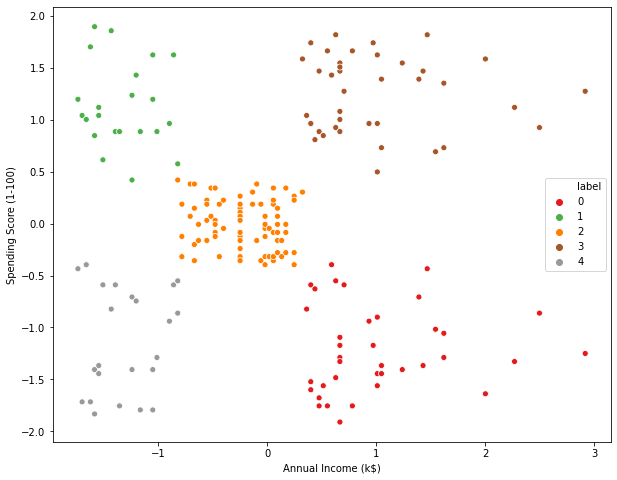

In [75]:
plt.figure(figsize=(10,8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = GMM_data, hue = 'label', legend = 'full', palette = 'Set1')

In [90]:
GMM_data['label'].value_counts().to_frame()

,label
2,78
3,39
0,38
4,23
1,22


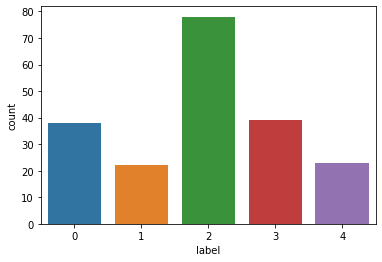

In [87]:
sns.countplot(GMM_data['label'], data = GMM_data)